In [ ]:
pip install NeuralForecast

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from neuralforecast.models import NHITS
from neuralforecast import NeuralForecast
from neuralforecast.core import NeuralForecast
from neuralforecast.models import Informer, Autoformer,NHITS,DilatedRNN
from neuralforecast.models import NBEATS,FEDformer

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
X_df = pd.read_csv('@trash/datasets/ECL/S/df_x.csv')
Y_df = pd.read_csv('@trash/datasets/ECL/S/df_y.csv')

In [ ]:
X_df

,ds,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 02:00:00,-0.413043,0.166667,-0.500000,-0.00137
1,2016-07-01 03:00:00,-0.369565,0.166667,-0.500000,-0.00137
2,2016-07-01 04:00:00,-0.326087,0.166667,-0.500000,-0.00137
3,2016-07-01 05:00:00,-0.282609,0.166667,-0.500000,-0.00137
4,2016-07-01 06:00:00,-0.239130,0.166667,-0.500000,-0.00137
...,...,...,...,...,...
26299,2019-07-01 21:00:00,0.413043,-0.500000,-0.500000,-0.00411
26300,2019-07-01 22:00:00,0.456522,-0.500000,-0.500000,-0.00411
26301,2019-07-01 23:00:00,0.500000,-0.500000,-0.500000,-0.00411
26302,2019-07-02 00:00:00,-0.500000,-0.333333,-0.466667,-0.00137


In [ ]:
Y_df

,ds,unique_id,y
0,2016-07-01 02:00:00,OT,-2.162911
1,2016-07-01 03:00:00,OT,-0.949045
2,2016-07-01 04:00:00,OT,-1.077105
3,2016-07-01 05:00:00,OT,-1.129411
4,2016-07-01 06:00:00,OT,-1.154662
...,...,...,...
26299,2019-07-01 21:00:00,OT,-1.060872
26300,2019-07-01 22:00:00,OT,-1.093338
26301,2019-07-01 23:00:00,OT,-1.282723
26302,2019-07-02 00:00:00,OT,-1.158270


In [ ]:
Y_df['unique_id'].unique()

array(['OT'], dtype=object)

In [ ]:
Y_df['ex_1']=X_df['ex_1']
Y_df['ex_2']=X_df['ex_2']
Y_df['ex_3']=X_df['ex_3']
Y_df['ex_4']=X_df['ex_4']

Y_df=Y_df.dropna()

In [ ]:
Y_df['ds'] = pd.to_datetime(Y_df['ds'])


## Horizon 96

In [ ]:
Y_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 02:00:00,OT,-2.162911,-0.413043,0.166667,-0.500000,-0.00137
1,2016-07-01 03:00:00,OT,-0.949045,-0.369565,0.166667,-0.500000,-0.00137
2,2016-07-01 04:00:00,OT,-1.077105,-0.326087,0.166667,-0.500000,-0.00137
3,2016-07-01 05:00:00,OT,-1.129411,-0.282609,0.166667,-0.500000,-0.00137
4,2016-07-01 06:00:00,OT,-1.154662,-0.239130,0.166667,-0.500000,-0.00137
...,...,...,...,...,...,...,...
26299,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.00411
26300,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.00411
26301,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.00411
26302,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.00137


In [ ]:
Y_train_df = Y_df.iloc[:26208,:]
Y_test_df = Y_df.iloc[26208:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,26208,2019-06-28 02:00:00,OT,-0.929204,-0.413043,0.166667,0.400000,-0.012329
1,26209,2019-06-28 03:00:00,OT,-0.974296,-0.369565,0.166667,0.400000,-0.012329
2,26210,2019-06-28 04:00:00,OT,-0.884113,-0.326087,0.166667,0.400000,-0.012329
3,26211,2019-06-28 05:00:00,OT,-1.210576,-0.282609,0.166667,0.400000,-0.012329
4,26212,2019-06-28 06:00:00,OT,-1.113178,-0.239130,0.166667,0.400000,-0.012329
...,...,...,...,...,...,...,...,...
91,26299,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.004110
92,26300,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.004110
93,26301,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.004110
94,26302,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.001370


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2019-06-28 02:00:00,OT,-0.929204,-0.413043,0.166667,0.400000,-0.012329
1,2019-06-28 03:00:00,OT,-0.974296,-0.369565,0.166667,0.400000,-0.012329
2,2019-06-28 04:00:00,OT,-0.884113,-0.326087,0.166667,0.400000,-0.012329
3,2019-06-28 05:00:00,OT,-1.210576,-0.282609,0.166667,0.400000,-0.012329
4,2019-06-28 06:00:00,OT,-1.113178,-0.239130,0.166667,0.400000,-0.012329
...,...,...,...,...,...,...,...
91,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.004110
92,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.004110
93,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.004110
94,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.001370


In [ ]:
model=DilatedRNN(h=96,
                       input_size=-1,
                        encoder_hidden_size=100,
                       max_steps=200,
                    )



C:\ProgramData\Anaconda3\envs\arjun\lib\site-packages\pytorch_lightning\utilities\parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq='H')

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type          | Params
--------------------------------------------------
0 | loss            | MAE           | 0     
1 | padder          | ConstantPad1d | 0     
2 | scaler          | TemporalNorm  | 0     
3 | rnn_stack       | Sequential    | 283 K 
4 | context_adapter | Linear        | 97.0 K
5 | mlp_decoder     | MLP           | 2.4 K 
--------------------------------------------------
382 K     Trainable params
0         Non-trainable params
382 K     Total params
1.532     Total estimated model params size (MB)


Sanity Checking: |                                                                               | 0/? [00:00<…

C:\ProgramData\Anaconda3\envs\arjun\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
C:\ProgramData\Anaconda3\envs\arjun\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
C:\ProgramData\Anaconda3\envs\arjun\lib\site-packages\pytorch_lightning\loops\fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |                                                                                      | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

`Trainer.fit` stopped: `max_steps=200` reached.
C:\ProgramData\Anaconda3\envs\arjun\lib\site-packages\neuralforecast\tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
C:\ProgramData\Anaconda3\envs\arjun\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.


Predicting: |                                                                                    | 0/? [00:00<…

C:\ProgramData\Anaconda3\envs\arjun\lib\site-packages\neuralforecast\core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,DilatedRNN
unique_id,,
OT,0,-1.358364
OT,1,-1.286731
OT,2,-1.384086
OT,3,-1.428383
OT,4,-1.428754
...,...,...
OT,91,-0.194621
OT,92,-0.275998
OT,93,-0.429188


<Axes: xlabel='ds'>

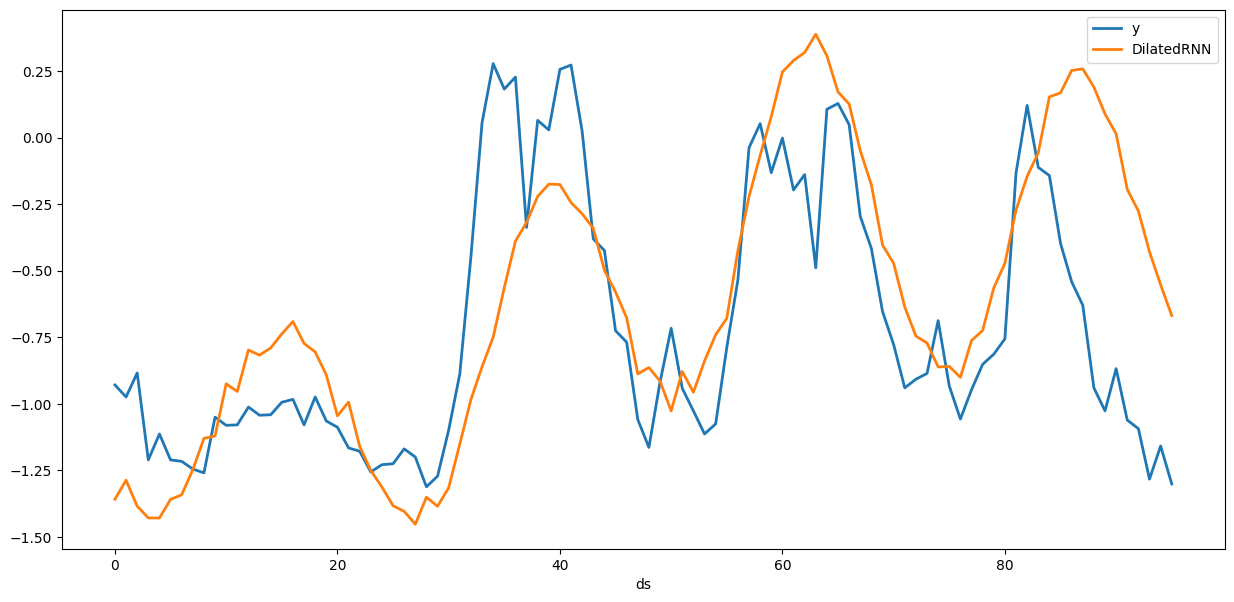

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'DilatedRNN']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

,DilatedRNN
ds,
0,-1.358364
1,-1.286731
2,-1.384086
3,-1.428383
4,-1.428754
...,...
91,-0.194621
92,-0.275998
93,-0.429188


In [ ]:
from neuralforecast.losses.numpy import mae,mse


mae_DilatedRNN = mae(Y_test_df['y'], forecasts['DilatedRNN'])
mse_DilatedRNN = mse(Y_test_df['y'], forecasts['DilatedRNN'])
print(f'DilatedRNN MAE: {mae_DilatedRNN:.3f}')
print(f'DilatedRNN MSE: {mse_DilatedRNN:.3f}')

DilatedRNN MAE: 0.306
DilatedRNN MSE: 0.167


## Horizon 192

In [ ]:
Y_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 02:00:00,OT,-2.162911,-0.413043,0.166667,-0.500000,-0.00137
1,2016-07-01 03:00:00,OT,-0.949045,-0.369565,0.166667,-0.500000,-0.00137
2,2016-07-01 04:00:00,OT,-1.077105,-0.326087,0.166667,-0.500000,-0.00137
3,2016-07-01 05:00:00,OT,-1.129411,-0.282609,0.166667,-0.500000,-0.00137
4,2016-07-01 06:00:00,OT,-1.154662,-0.239130,0.166667,-0.500000,-0.00137
...,...,...,...,...,...,...,...
26299,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.00411
26300,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.00411
26301,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.00411
26302,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.00137


In [ ]:
Y_train_df = Y_df.iloc[:26112,:]
Y_test_df = Y_df.iloc[26112:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,26112,2019-06-24 02:00:00,OT,-0.857058,-0.413043,-0.500000,0.266667,-0.023288
1,26113,2019-06-24 03:00:00,OT,-0.700139,-0.369565,-0.500000,0.266667,-0.023288
2,26114,2019-06-24 04:00:00,OT,-0.402534,-0.326087,-0.500000,0.266667,-0.023288
3,26115,2019-06-24 05:00:00,OT,-0.658655,-0.282609,-0.500000,0.266667,-0.023288
4,26116,2019-06-24 06:00:00,OT,-0.763267,-0.239130,-0.500000,0.266667,-0.023288
...,...,...,...,...,...,...,...,...
187,26299,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.004110
188,26300,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.004110
189,26301,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.004110
190,26302,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.001370


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2019-06-24 02:00:00,OT,-0.857058,-0.413043,-0.500000,0.266667,-0.023288
1,2019-06-24 03:00:00,OT,-0.700139,-0.369565,-0.500000,0.266667,-0.023288
2,2019-06-24 04:00:00,OT,-0.402534,-0.326087,-0.500000,0.266667,-0.023288
3,2019-06-24 05:00:00,OT,-0.658655,-0.282609,-0.500000,0.266667,-0.023288
4,2019-06-24 06:00:00,OT,-0.763267,-0.239130,-0.500000,0.266667,-0.023288
...,...,...,...,...,...,...,...
187,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.004110
188,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.004110
189,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.004110
190,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.001370


In [ ]:
model=DilatedRNN(h=192,
                       input_size=24,
                        encoder_hidden_size=100,
                       max_steps=200,
                    )



C:\ProgramData\Anaconda3\envs\arjun\lib\site-packages\pytorch_lightning\utilities\parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq='H')

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type          | Params
--------------------------------------------------
0 | loss            | MAE           | 0     
1 | padder          | ConstantPad1d | 0     
2 | scaler          | TemporalNorm  | 0     
3 | rnn_stack       | Sequential    | 283 K 
4 | context_adapter | Linear        | 193 K 
5 | mlp_decoder     | MLP           | 2.4 K 
--------------------------------------------------
479 K     Trainable params
0         Non-trainable params
479 K     Total params
1.920     Total estimated model params size (MB)


Sanity Checking: |                                                                               | 0/? [00:00<…

C:\ProgramData\Anaconda3\envs\arjun\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
C:\ProgramData\Anaconda3\envs\arjun\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
C:\ProgramData\Anaconda3\envs\arjun\lib\site-packages\pytorch_lightning\loops\fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |                                                                                      | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

`Trainer.fit` stopped: `max_steps=200` reached.
C:\ProgramData\Anaconda3\envs\arjun\lib\site-packages\neuralforecast\tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
C:\ProgramData\Anaconda3\envs\arjun\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.


Predicting: |                                                                                    | 0/? [00:00<…

C:\ProgramData\Anaconda3\envs\arjun\lib\site-packages\neuralforecast\core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts=forecasts.iloc[:192,:]

<Axes: xlabel='ds'>

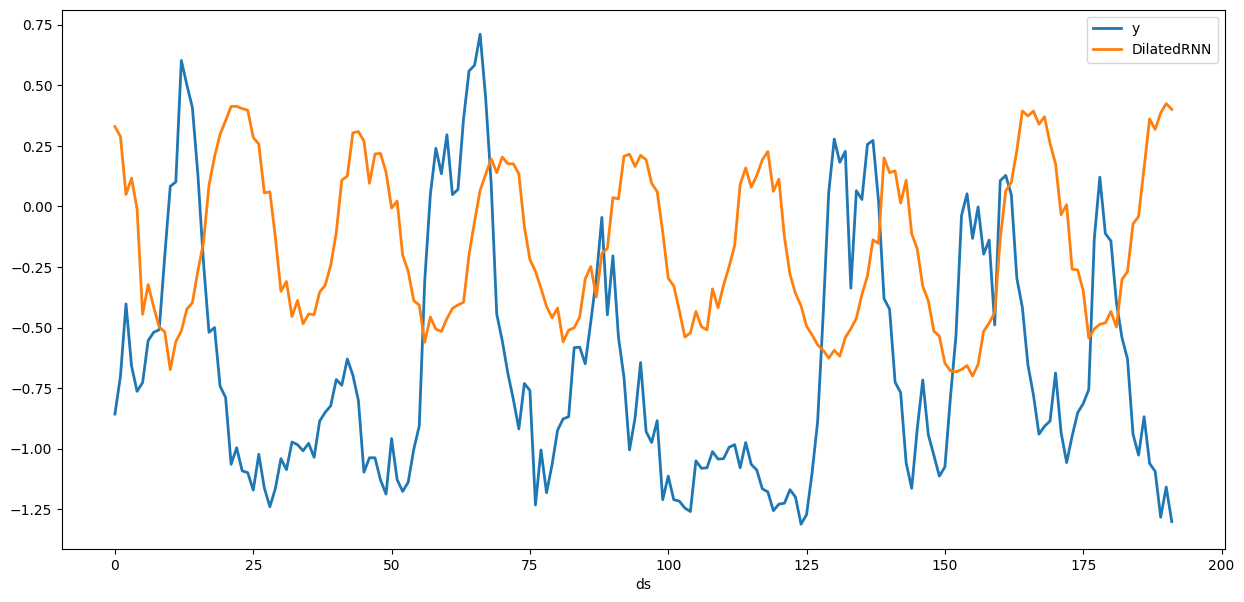

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'DilatedRNN']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

,DilatedRNN
ds,
0,0.329288
1,0.287610
2,0.048933
3,0.116389
4,-0.010352
...,...
187,0.360737
188,0.317551
189,0.385298


In [ ]:
from neuralforecast.losses.numpy import mae,mse


mae_DilatedRNN = mae(Y_test_df['y'], forecasts['DilatedRNN'])
mse_DilatedRNN = mse(Y_test_df['y'], forecasts['DilatedRNN'])
print(f'DilatedRNN MAE: {mae_DilatedRNN:.3f}')
print(f'DilatedRNN MSE: {mse_DilatedRNN:.3f}')

DilatedRNN MAE: 0.737
DilatedRNN MSE: 0.689


## Horizon 336

In [ ]:
Y_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 02:00:00,OT,-2.162911,-0.413043,0.166667,-0.500000,-0.00137
1,2016-07-01 03:00:00,OT,-0.949045,-0.369565,0.166667,-0.500000,-0.00137
2,2016-07-01 04:00:00,OT,-1.077105,-0.326087,0.166667,-0.500000,-0.00137
3,2016-07-01 05:00:00,OT,-1.129411,-0.282609,0.166667,-0.500000,-0.00137
4,2016-07-01 06:00:00,OT,-1.154662,-0.239130,0.166667,-0.500000,-0.00137
...,...,...,...,...,...,...,...
26299,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.00411
26300,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.00411
26301,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.00411
26302,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.00137


In [ ]:
Y_train_df = Y_df.iloc[:25968,:]
Y_test_df = Y_df.iloc[25968:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,25968,2019-06-18 02:00:00,OT,-0.844432,-0.413043,-0.333333,0.066667,-0.039726
1,25969,2019-06-18 03:00:00,OT,-0.869683,-0.369565,-0.333333,0.066667,-0.039726
2,25970,2019-06-18 04:00:00,OT,-0.727194,-0.326087,-0.333333,0.066667,-0.039726
3,25971,2019-06-18 05:00:00,OT,-0.830003,-0.282609,-0.333333,0.066667,-0.039726
4,25972,2019-06-18 06:00:00,OT,-1.037424,-0.239130,-0.333333,0.066667,-0.039726
...,...,...,...,...,...,...,...,...
331,26299,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.004110
332,26300,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.004110
333,26301,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.004110
334,26302,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.001370


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2019-06-18 02:00:00,OT,-0.844432,-0.413043,-0.333333,0.066667,-0.039726
1,2019-06-18 03:00:00,OT,-0.869683,-0.369565,-0.333333,0.066667,-0.039726
2,2019-06-18 04:00:00,OT,-0.727194,-0.326087,-0.333333,0.066667,-0.039726
3,2019-06-18 05:00:00,OT,-0.830003,-0.282609,-0.333333,0.066667,-0.039726
4,2019-06-18 06:00:00,OT,-1.037424,-0.239130,-0.333333,0.066667,-0.039726
...,...,...,...,...,...,...,...
331,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.004110
332,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.004110
333,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.004110
334,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.001370


In [ ]:
model=DilatedRNN(h=336,
                       input_size=-1,
                        encoder_hidden_size=10,
                       max_steps=20,
                    )



C:\ProgramData\Anaconda3\envs\arjun\lib\site-packages\pytorch_lightning\utilities\parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq='H')

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


C:\ProgramData\Anaconda3\envs\arjun\lib\site-packages\neuralforecast\common\_base_model.py:204: UserWarning: val_check_steps is greater than max_steps,                     setting val_check_steps to max_steps
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type          | Params
--------------------------------------------------
0 | loss            | MAE           | 0     
1 | padder          | ConstantPad1d | 0     
2 | scaler          | TemporalNorm  | 0     
3 | rnn_stack       | Sequential    | 3.2 K 
4 | context_adapter | Linear        | 37.0 K
5 | mlp_decoder     | MLP           | 2.4 K 
--------------------------------------------------
42.5 K    Trainable params
0         Non-trainable params
42.5 K    Total params
0.170     Total estimated model params size (MB)


Sanity Checking: |                                                                               | 0/? [00:00<…

C:\ProgramData\Anaconda3\envs\arjun\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
C:\ProgramData\Anaconda3\envs\arjun\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
C:\ProgramData\Anaconda3\envs\arjun\lib\site-packages\pytorch_lightning\loops\fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |                                                                                      | 0/? [00:00<…

OutOfMemoryError: CUDA out of memory. Tried to allocate 6.50 GiB. GPU 0 has a total capacity of 12.00 GiB of which 0 bytes is free. Of the allocated memory 14.03 GiB is allocated by PyTorch, and 6.14 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'DilatedRNN']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

In [ ]:
from neuralforecast.losses.numpy import mae,mse


mae_DilatedRNN = mae(Y_test_df['y'], forecasts['DilatedRNN'])
mse_DilatedRNN = mse(Y_test_df['y'], forecasts['DilatedRNN'])
print(f'DilatedRNN MAE: {mae_DilatedRNN:.3f}')
print(f'DilatedRNN MSE: {mse_DilatedRNN:.3f}')

## Horizon 720

In [ ]:
Y_df

In [ ]:
Y_train_df = Y_df.iloc[:25584,:]
Y_test_df = Y_df.iloc[25584:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

In [ ]:
model=DilatedRNN(h=720,
                       input_size=-1,
                        encoder_hidden_size=100,
                       max_steps=200,
                    )



In [ ]:
nf = NeuralForecast(models=[model],freq='H')

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'DilatedRNN']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

In [ ]:
from neuralforecast.losses.numpy import mae,mse


mae_DilatedRNN = mae(Y_test_df['y'], forecasts['DilatedRNN'])
mse_DilatedRNN = mse(Y_test_df['y'], forecasts['DilatedRNN'])
print(f'DilatedRNN MAE: {mae_DilatedRNN:.3f}')
print(f'DilatedRNN MSE: {mse_DilatedRNN:.3f}')